# Setup

> Lembrar de executar a próxima célula sempre que começar algo

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import scipy as s

%matplotlib inline

""" usar isso aqui só se tiver o latex instalado, caso não tiver, deixa comentado """
# plt.rc('text', usetex=True)

rc = {"font.family" : "serif", # fonte serifada
      "mathtext.fontset" : "cm", # texto matemático em LaTeX
      "font.size": 12, # Usar tamanho 12 ou 14
      "axes.axisbelow": True,  # grid abaixo dos dadosp
     }

plt.rcParams.update(rc)

""" Normalmente não precisa de montar o drive toda vez, mas se der algum erro de salvar arquivo é só montar o drive """
from google.colab import drive
drive.mount('/content/drive')

caminho_lab = './drive/MyDrive/LAB_FISICA_B/'

def add_c_grid(a1=0.5, a2=0.5):
    ax.minorticks_on()
    ax.grid(which='major', alpha=a1)
    ax.grid(which='minor', alpha=a2)

def add_sci_limits(ax='both', limits=(0,0)):
    plt.ticklabel_format(
        axis=ax,
        style='sci',
        useMathText=True,
        scilimits=limits)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# LAB 1  - Experimento de Millikan

In [39]:
try:
    os.mkdir(caminho_lab + 'LAB1/')
except: 
    print("Pasta já criada")

caminho_lab1 = caminho_lab + 'LAB1/'

# Salvar as figuras no 'caminho_lab1', exemplo: plt.savefig(caminho_lab2 + 'nome_figura.pdf')

Pasta já criada


## Procedimento

Pra cada valor de tensão especificado na tabela:

1. Anota $v_1$
2. Anota $v_2$
3. Calcula $q$
3. Calcula $r$

Depois de fazer isso ai tudo faz a a tabela 2 com os resultados da 1 pra responder o questionário

### Tabela 1

In [40]:
tab_1 = pd.DataFrame({
    'Gota': np.arange(1,26),
    'Potencial': 0,
    'v_1': 0.0,
    'v_2': 0.0,
    'Raio': 0.0,
    'Carga da gota': 0.0
})

In [41]:
tab_1.loc[:7,'Potencial'] = 300
tab_1.loc[8:18,'Potencial'] = 400
tab_1.loc[18:,'Potencial'] = 500

tab_1


,Gota,Potencial,v_1,v_2,Raio,Carga da gota
0,1,300,0.0,0.0,0.0,0.0
1,2,300,0.0,0.0,0.0,0.0
2,3,300,0.0,0.0,0.0,0.0
3,4,300,0.0,0.0,0.0,0.0
4,5,300,0.0,0.0,0.0,0.0
5,6,300,0.0,0.0,0.0,0.0
6,7,300,0.0,0.0,0.0,0.0
7,8,300,0.0,0.0,0.0,0.0
8,9,400,0.0,0.0,0.0,0.0
9,10,400,0.0,0.0,0.0,0.0


### Anota as velocidades

In [42]:
v1_v2 = (
    # 300V (1 a 8)
    [4.333718, 3.532485],
    [4.576302, 3.883577], 
    [4.937546, 3.958755],
    [3.550490, 1.851601],
    [2.960378, 1.646199],
    [3.158286, 2.179495],
    [1.411236, 0.744405],
    [4.531342, 3.252921],
    # 400V [9 a 19]
    [2.686359, 1.299183],
    [2.934860, 2.047068],
    [2.649203, 0.867452],
    [3.704767, 2.354336],
    [1.756342, 1.063617],
    [3.452334, 2.907575],
    [4.644700, 3.977869],
    [1.689973, 0.302798],
    [5.499223, 3.960136],
    [6.671307, 5.783515],
    # 500V [19 a 25]
    [6.477103, 5.977200],
    [7.278902, 6.559790],
    [6.889735, 6.454717],
    [5.228058, 3.361474],
    [3.075303, 0.942381],
    [6.012105, 5.422997],
    [6.575122, 4.957121],
)

v1, v2 = np.array(list(zip(*v1_v2)))

v1, v2

(array([4.333718, 4.576302, 4.937546, 3.55049 , 2.960378, 3.158286,
        1.411236, 4.531342, 2.686359, 2.93486 , 2.649203, 3.704767,
        1.756342, 3.452334, 4.6447  , 1.689973, 5.499223, 6.671307,
        6.477103, 7.278902, 6.889735, 5.228058, 3.075303, 6.012105,
        6.575122]),
 array([3.532485, 3.883577, 3.958755, 1.851601, 1.646199, 2.179495,
        0.744405, 3.252921, 1.299183, 2.047068, 0.867452, 2.354336,
        1.063617, 2.907575, 3.977869, 0.302798, 3.960136, 5.783515,
        5.9772  , 6.55979 , 6.454717, 3.361474, 0.942381, 5.422997,
        4.957121]))

### Coloca os valor na tabela

In [43]:
tab_1['v_1'] = v1 * 10**-4
tab_1['v_2'] = v2 * 10**-4

tab_1

,Gota,Potencial,v_1,v_2,Raio,Carga da gota
0,1,300,0.000433,0.000353,0.0,0.0
1,2,300,0.000458,0.000388,0.0,0.0
2,3,300,0.000494,0.000396,0.0,0.0
3,4,300,0.000355,0.000185,0.0,0.0
4,5,300,0.000296,0.000165,0.0,0.0
5,6,300,0.000316,0.000218,0.0,0.0
6,7,300,0.000141,0.000074,0.0,0.0
7,8,300,0.000453,0.000325,0.0,0.0
8,9,400,0.000269,0.000130,0.0,0.0
9,10,400,0.000293,0.000205,0.0,0.0


### Faz as conta

In [44]:
def calcula_raio(c2, v1, v2):
    return (c2 * np.sqrt(v1 - v2))

def calcula_carga(c1, v1, v2, tensao):
    return (c1 * ((v1 + v2)/ tensao) * np.sqrt(v1 - v2))

### Dicionário de constantes

In [45]:
ctes = {
    'C1': 2.73e-11,
    'C2': 2.37e-5,
    'd': 2.5,
    'rho': 1.03e3,
    'eta': 1.82e-5,
    'g': 9.81,
    'e': 1.602176634e-19
}

In [46]:
tab_1['Raio'] = calcula_raio(ctes['C2'], tab_1['v_1'], tab_1['v_2'])
tab_1['Carga da gota'] = calcula_carga(c1=ctes['C1'], v1=tab_1['v_1'], v2=tab_1['v_2'], tensao=tab_1['Potencial'])

In [47]:
tab_latex = tab_1.rename({
    'Potencial': 'Potencial $[V]$',
    'v_1': '$v_1 [10^{-4} m/s]$',
    'v_2': '$v_2 [10^{-4} m/s]$',
    'Raio': 'Raio $[10^{-7} m]$',
    'Carga da gota': 'Carga da gota $[10^{-19} C]$',
}, axis=1, inplace=False)

tab_latex.iloc[:, [2,3]] = tab_latex.iloc[:, [2,3]] * 1e4
tab_latex.iloc[:,4] = tab_latex.iloc[:,4] * 1e7
tab_latex.iloc[:,5] = tab_latex.iloc[:,5] * 1e19

tab_latex.to_latex(buf=caminho_lab1 + 'tab1_lab1.txt', 
                     index=False, 
                     escape=False, 
                     encoding='UTF-8', 
                     bold_rows=True)

tab_latex.iloc[:, :4].to_latex(buf=caminho_lab1 + 'tab0_lab1.txt', 
                     index=False, 
                     escape=False, 
                     encoding='UTF-8', 
                     bold_rows=True)

tab_latex

,Gota,Potencial $[V]$,$v_1 [10^{-4} m/s]$,$v_2 [10^{-4} m/s]$,Raio $[10^{-7} m]$,Carga da gota $[10^{-19} C]$
0,1,300,4.333718,3.532485,2.121425,6.407461
1,2,300,4.576302,3.883577,1.972553,6.407461
2,3,300,4.937546,3.958755,2.344733,8.009324
3,4,300,3.550490,1.851601,3.089092,6.407458
4,5,300,2.960378,1.646199,2.716912,4.805593
5,6,300,3.158286,2.179495,2.344733,4.805595
6,7,300,1.411236,0.744405,1.935335,1.601864
7,8,300,4.531342,3.252921,2.679695,8.009324
8,9,400,2.686359,1.299183,2.791349,3.203729
9,10,400,2.934860,2.047068,2.233078,3.203729


### Gráfico da carga $\times $ raio das gotas

In [48]:
raio = tab_1['Raio'].to_numpy()
carga = tab_1['Carga da gota'].to_numpy()

In [49]:
p1 = carga < 2e-19
p2 = (carga > 2e-19) & (carga < 4e-19)
p3 = (carga > 4e-19) & (carga < 5e-19)
p4 = (carga > 6e-19) & (carga < 7e-19)
p5 = carga > 7e-19


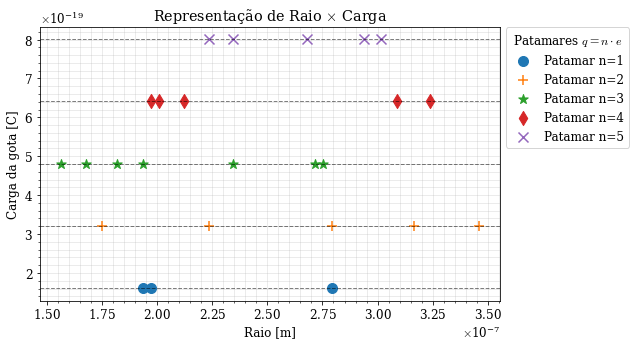

In [50]:
f, ax = plt.subplots(figsize=(9,5))

ax.scatter(raio[p1], 
           carga[p1],
           marker='o',
           s=100,
           label='Patamar n=1')


ax.scatter(raio[p2], 
           carga[p2],
           marker='+',
           s=100,
           label='Patamar n=2')

ax.scatter(raio[p3], 
           carga[p3],
           marker='*',
           s=100,
           label='Patamar n=3')

ax.scatter(raio[p4], 
           carga[p4],
           marker='d',
           s=100,
           label='Patamar n=4')

ax.scatter(raio[p5], 
           carga[p5],
           marker='x',
           s=100,
           label='Patamar n=5')

for i in range(1, 6):
    ax.axhline(y=i*ctes['e'], 
               linestyle='--', 
               color='black', 
               alpha=0.5,
               linewidth=1.0)

ax.set(
    title=r'Representação de Raio $\times$ Carga',
    xlabel=r'Raio [m]',
    ylabel=r'Carga da gota [C]'
)

add_c_grid(a1=0.3, a2=0.3)

ax.legend(title=r'Patamares $q= n \cdot e$',
          bbox_to_anchor=(1, 1.02))


plt.ticklabel_format(
    axis='both',
    style='sci',
    useMathText=True,
    scilimits=(0,0))

f.tight_layout()
f.savefig(caminho_lab1 + 'carga_raio.pdf')

plt.show()

## Questionário



### 1)

In [51]:
tab_2 = tab_1.iloc[:, [0,-1]]

tab_2.head()

,Gota,Carga da gota
0,1,6.407461e-19
1,2,6.407461e-19
2,3,8.009324e-19
3,4,6.407458e-19
4,5,4.805593e-19


In [96]:
tab_2['Nº de elétrons'] = (tab_2['Carga da gota']/ctes['e']).round().astype(int)

tab_2['Carga de um elétron'] = tab_2['Carga da gota']/ tab_2['Nº de elétrons'] 

tab_2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Gota,Carga da gota,Nº de elétrons,Carga de um elétron
0,1,6.407461e-19,4,1.601865e-19
1,2,6.407461e-19,4,1.601865e-19
2,3,8.009324e-19,5,1.601865e-19
3,4,6.407458e-19,4,1.601865e-19
4,5,4.805593e-19,3,1.601864e-19
5,6,4.805595e-19,3,1.601865e-19
6,7,1.601864e-19,1,1.601864e-19
7,8,8.009324e-19,5,1.601865e-19
8,9,3.203729e-19,2,1.601865e-19
9,10,3.203729e-19,2,1.601864e-19


In [74]:
# tab_2['Nº de elétrons'] = tab_2['Carga da gota']/ctes['e']
# tab_2['Carga de um elétron'] = tab_2['Carga da gota']/ tab_2['Nº de elétrons'] 

# tab_2.head()

In [75]:
tab_2_latex = tab_2.rename({
    'Carga da gota': 'Carga da gota $10^{-19}[C]$',
    'Carga de um elétron': 'Carga de um elétron $10^{-19}[C]$',
}, axis=1, inplace=False)

tab_2_latex.iloc[:, [1,3]] = tab_2_latex.iloc[:, [1,3]] *1e19
tab_2_latex['Nº de elétrons'] = tab_2_latex['Nº de elétrons'].round().astype(int)


tab_2_latex.to_latex(buf=caminho_lab1 + 'tab2_lab1.txt', 
                     index=False, 
                     escape=False, 
                     encoding='UTF-8', 
                     bold_rows=True,)

tab_2_latex.head()

,Gota,Carga da gota $10^{-19}[C]$,Nº de elétrons,Carga de um elétron $10^{-19}[C]$
0,1,6.407461,4,1.601865
1,2,6.407461,4,1.601865
2,3,8.009324,5,1.601865
3,4,6.407458,4,1.601865
4,5,4.805593,3,1.601864


### 2)

In [98]:
soma_carga = tab_2_latex['Carga da gota $10^{-19}[C]$'].sum()
soma_n_elet = tab_2_latex['Nº de elétrons'].sum()

carga_media_eletron = (soma_carga / soma_n_elet) *1e-19

soma_carga, soma_n_elet, carga_media_eletron

(126.53617365706543, 79, 1.6017237171780434e-19)

### 3)

In [77]:
erro = abs((ctes['e'] - carga_media_eletron) / ctes['e']) * 100

print(f'{erro:.6f}%')

0.028269%


### 4)

In [78]:
empuxo = 4.0/3.0 * np.pi * ((5.08e-7)**3) * ctes['rho'] * ctes['g']

empuxo

# ctes['']

5.548632715884336e-15

### 5)

In [79]:
3 * ctes['e']

4.806529901999999e-19

### 6)

In [80]:
fe = 7.53e-14

fe/empuxo

13.570910863217726

In [81]:
fv = 8.09e-14

fv/empuxo

14.580168510415856

### 7)

# Exemplos e anotações

seção preu lembrar como faz as coisas sem ter q procurar na internet toda hora

* Gráfico pra colocar sozinho na página -> tamanho 9x5. Fonte 12
* Gráfico ao lado de outro na página -> tamanho 7x7. Fonte 14

In [82]:
# tabela_lab1 = pd.DataFrame({
#     r'Nº da gota': np.arange(1,26),
#     r'Carga da gota': 0.0,
#     r'Nº de elétrons': 0.0,
#     r'Carga de um elétron': 0.0
# })

# # tem que faze as conta maluca q nao faço ideia de como faz

# # tabela_lab1.to_latex(buf=caminho_lab1 + 'tab_lab1.txt', 
# #                      index=False, 
# #                      escape=False, 
# #                      encoding='UTF-8', 
# #                      bold_rows=True)

# # salvar em .txt direto dá pra usar mesma coisa que salvar em .tex direto

# tabela_lab1

In [83]:
# x = np.linspace(-20, 21, 1000)
# y = 1e-3 * np.cos(x)
# y2 = 1e-3 * np.cos(x)


# """ Em 1 dimensão o gradiente e a derivada são a mesma coia [...]"""
# dx = x[1]-x[0] # a derivada deve acontecer entre o termo n+1 - n mas tipicamente 1 e 0 servem
# deriv_y = np.diff(y) / dx
# grad_y = np.gradient(y, dx)

# f, ax = plt.subplots(figsize=(9,7))

# ax.plot(x, y, '-', label=r'$\sin(x)$')
# ax.plot(x, y2, ':', label=r'$\cos(x)$')
# ax.plot(x[1:], deriv_y, '-', label=r'$ \frac{\partial y}{\partial x} \sin(x)$')
# ax.plot(x, grad_y, '--', label=r'$ \frac{d y}{d x} \sin(x)$')

# ax.legend(loc='center right', title='Funções', fontsize=14)
# ax.grid()

# ax.set(
#     title=r'Funções e suas derivadas parciais',
# )

# # ax.set_title(), ax.set_algumacoisa sempre dá tbm

# plt.ticklabel_format(
#     axis='y',
#     style='sci',
#     useMathText=True,
#     scilimits=(0,0)) 

# f.tight_layout()
# # f.savefig(caminho_lab1 + 'teste.pdf')


In [84]:
# # fazendo uma regressão 

# x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
# y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

# coeficientes = np.polyfit(x, y, deg=3)
# polinomio = np.poly1d(coeficientes)
# regressao = polinomio(x)

# def regressao_polinomial(x, y, deg=1, return_all=False):
#     coeficientes = np.polyfit(x, y, deg=deg)
#     polinomio = np.poly1d(coeficientes)
#     regressao = polinomio(x)
#     return [coeficientes, polinomio, regressao] if return_all else regressao

In [85]:
# # jeito 1 de plotar


# x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
# y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]


# coef, pol, regressao = regressao_polinomial(x,y, deg=3, return_all=True)

# label_reg = f'${coef[0]:.4f} x^3 + ...$'

# plt.figure(figsize=(9,4))

# plt.scatter(x, y, label='Dados coletados')
# plt.plot(x, regressao, '--', label=label_reg)

# plt.title('Exemplo de Regressão polinomial')
# plt.xlabel(r'x [adimensional]')
# plt.ylabel(r'y [adimensional]')


# plt.ticklabel_format(axis='y',
#                      style='sci',
#                      useMathText=True,
#                      scilimits=None)


# plt.legend(loc='best')
# plt.grid()

# media_y = np.mean(y)
# plt.axhline(y=media_y, linestyle = '--', color='red')
# plt.annotate(s='Média', xy=(10, media_y + 1))

# plt.minorticks_on()
# plt.grid(which='major')
# plt.grid(which='minor', alpha=0.3)


# plt.tight_layout()
# # plt.savefig(caminho_lab + 'reg.pdf')
# plt.show()

# type(pol)

In [86]:
# # jeito 2 de plotar

# fig, ax = plt.subplots(figsize=(9,4))

# ax.scatter(x, y, marker='o', label='Dados coletados')

# for i in range(2,6):
#     regressao = regressao_polinomial(x,y, deg=i)
#     ax.plot(x, regressao, ':', label=f'Regressão polinomial de grau {i}')

# ax.set(
#     title = 'Exemplo de Regressão polinomial',
#     xlabel = r'x [adimensional]',
#     ylabel = r'y [adimensional]',)

# ax.ticklabel_format(axis='y',
#                     style='sci',
#                     useMathText=True,
#                     scilimits=(0,0))

# ax.legend(loc='best')
# ax.grid()

# fig.tight_layout()
# # fig.savefig(caminho_lab1 + 'reg2.pdf')

In [87]:
# x = np.linspace(-10, 10, 100)
# y1 = x**3 + 2*x +1 -3 -x**4 

# dx = x[1] - x[0]
# deriv_y1 = np.diff(y1) / dx
# grad_y1 = np.gradient(y1, dx)

# f, ax = plt.subplots(figsize=(9,7))


# ax.scatter(x,y1)
# ax.plot(x[1:], deriv_y1, ':')
# ax.plot(x, grad_y1, '--')

# ax.set(
#     ylim=[-100,100],
#     xlim=[-2,2]
# )

# ax.minorticks_on()
# ax.grid(which='major')
# ax.grid(which='minor')

# plt.show()

In [88]:
# # gridspec maluco

# fig = plt.figure(figsize=(12, 12))
# gs = plt.GridSpec(3, 3)
# ax1 = fig.add_subplot(gs[0, :])
# ax2 = fig.add_subplot(gs[1, :2])
# ax3 = fig.add_subplot(gs[1:, 2])
# ax4 = fig.add_subplot(gs[2, 0])
# ax5 = fig.add_subplot(gs[2, 1])

In [89]:
# import numpy as np
# import matplotlib.pyplot as plt

# vth = 0.5
# vgs = 2.5
# vds = np.arange(0, 6.1, 0.1)

# def calcula_ids(vgs, vds, vth, kn_l=1, w=1,l=1, lambda_=0):
#     ids = []
#     for i in range(len(vds)):
#         if vds[i] <= vgs - vth:
#             ids.append((kn_l * w/l * ((vgs - vth) - (vds[i]/2)) * vds[i]) * (1 + lambda_* vds[i]))
#         else: 
#             ids.append(0.5 * kn_l * w/l * ((vgs - vth)**2) * (1 + lambda_* vds[i]) )
#     return ids

# def calcula_ids_2(vgs, vds, vth, kn_l=1, w=1,l=1, lambda_=0):
#     triodo = vds <= vgs - vth
#     satura = vds > vgs - vth

#     ids_triodo = (kn_l * w/l * ((vgs - vth) - (vds[triodo]/2)) * vds[triodo]) * (1 + lambda_* vds[triodo])
#     ids_satura =  0.5 * kn_l * w/l * ((vgs - vth)**2) * (1 + lambda_* vds[satura])

#     return np.append(ids_triodo, ids_satura)





# ids = calcula_ids(vgs=vgs, vth=vth, vds=vds, lambda_=50e-3)
# ids2 = calcula_ids_2(vgs=vgs, vth=vth, vds=vds, lambda_=50e-3)

# lambdas = [50e-3, 100e-3, 150e-3]
# for l in lambdas:
#     ids = calcula_ids(vgs=vgs, vth=vth, vds=vds, lambda_=l)
#     plt.plot(vds,ids, ':', label=f'$\lambda = {l}$')

# plt.legend(loc='best')

# plt.title(r'$I_{DS} \times V_{DS}$')
# # plt.savefig(caminho_lab1+ 'teste.pdf')
# plt.show()

In [90]:
# pra testar



In [91]:
# %timeit calcula_ids(vgs=vgs, vth=vth, vds=vds, lambda_=50e-3)

In [92]:
# %timeit calcula_ids_2(vgs=vgs, vth=vth, vds=vds, lambda_=50e-3)